In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/SEM10/MLOA/MINST-dataset/train.csv')
df.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape
df.dropna(inplace = True, axis = 0)

In [ ]:
X= df.iloc[:, 1:]
y= df.iloc[:,0]

In [ ]:
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


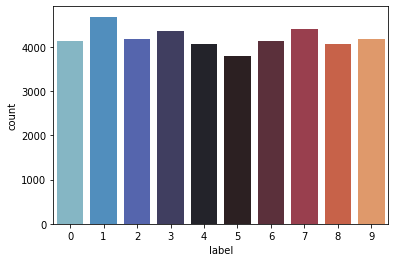

In [ ]:
# Digits to be classified
order= list(np.sort(df['label'].unique()))
print(order)

sns.countplot(df['label'], palette = 'icefire')

The image label is  1


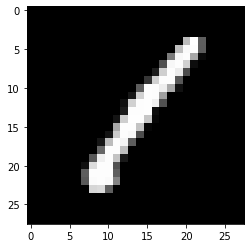

In [ ]:
pic1= np.array(X.loc[0])
pic1= pic1.reshape(28,28)
plt.imshow(pic1, cmap='gray')
print("The image label is ", y[0])

The image label is  0


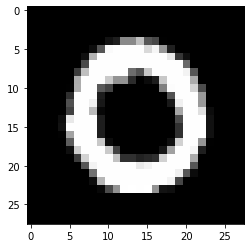

In [ ]:
pic1= np.array(X.loc[1])
pic1= pic1.reshape(28,28)
plt.imshow(pic1, cmap='gray')
print("The image label is ", y[1])

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state= 8) 

#### PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=.95)
pca.fit(X_train)

PCA(n_components=0.95)

In [ ]:
print(f'Total number of components used after PCA : {pca.n_components_}')

Total number of components used after PCA : 316


In [ ]:
train = pca.transform(X_train)
test = pca.transform(X_test)

print(f'train_img shape : {train.shape}')
print(f'test_img shape : {test.shape}')

train_img shape : (33600, 316)
test_img shape : (8400, 316)


### CNN

In [ ]:
#MODEL BUILD
model = Sequential()
model.add(Dense(128, activation='relu', input_dim= 316)) #784 colums
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax')) #10 class for classficatiom

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               40576     
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 45,034
Trainable params: 45,034
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'Adam', metrics = 'accuracy') 

In [ ]:
history = model.fit(train, y_train, epochs = 20, validation_split= 0.25)

Epoch 1/20
788/788 [==============================] - 3s 3ms/step - loss: 0.4620 - accuracy: 0.8730 - val_loss: 0.2642 - val_accuracy: 0.9264
Epoch 2/20
788/788 [==============================] - 2s 3ms/step - loss: 0.1693 - accuracy: 0.9540 - val_loss: 0.2212 - val_accuracy: 0.9431
Epoch 3/20
788/788 [==============================] - 2s 3ms/step - loss: 0.1145 - accuracy: 0.9696 - val_loss: 0.2039 - val_accuracy: 0.9504
Epoch 4/20
788/788 [==============================] - 2s 3ms/step - loss: 0.0807 - accuracy: 0.9788 - val_loss: 0.2035 - val_accuracy: 0.9532
Epoch 5/20
788/788 [==============================] - 2s 3ms/step - loss: 0.0582 - accuracy: 0.9846 - val_loss: 0.2041 - val_accuracy: 0.9529
Epoch 6/20
788/788 [==============================] - 2s 3ms/step - loss: 0.0489 - accuracy: 0.9878 - val_loss: 0.1904 - val_accuracy: 0.9579
Epoch 7/20
788/788 [==============================] - 2s 3ms/step - loss: 0.0332 - accuracy: 0.9918 - val_loss: 0.2131 - val_accuracy: 0.9569
Epoch 

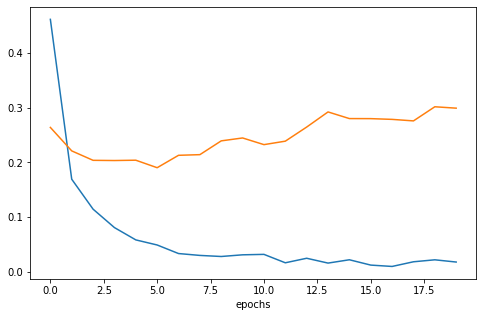

In [ ]:
# plotting the change in loss with epochs- 
plt.figure(figsize=(8,5))
plt.xlabel('epochs')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

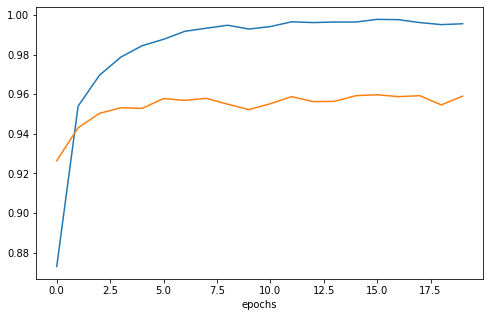

In [ ]:
# plotting the change in accuracy with epochs- 
plt.figure(figsize=(8,5))
plt.xlabel('epochs')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
#probilities
y_prob= model.predict(test)

263/263 [==============================] - 0s 1ms/step


In [ ]:
y_pred= y_prob.argmax(axis=1)

In [ ]:
accuracy_score(y_test, y_pred)

0.9594047619047619

In [ ]:
y_pred

array([0, 6, 7, ..., 3, 4, 1])

### SVM

In [ ]:
model_linear= SVC(kernel= 'linear')
model_linear.fit(train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred= model_linear.predict(test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9276190476190476 

[[823   0   5   2   3   8   6   1   3   1]
 [  1 933   2   2   1   1   1   2   6   0]
 [ 12   9 746  13   7   4   8   6  10   2]
 [  2   1  21 794   6  23   1   2  16   4]
 [  2   4   8   1 727   1   3   5   3   9]
 [  9   8   1  30   7 655  15   2  10   8]
 [  5   1  13   0   8  13 807   0   2   0]
 [  3   4  11   8  10   0   1 831   4  19]
 [  3  16   8  21   7  23   5   5 721   9]
 [  3   5   8  10  38   5   0  21   1 755]]


In [ ]:
model_rbf= SVC(kernel='rbf')
model_rbf.fit(train, y_train)
y_pred_rbf= model_rbf.predict(test)

In [ ]:
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_rbf), "\n")
# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_rbf))

accuracy: 0.9602380952380952 

[[831   0   5   1   1   1   7   2   4   0]
 [  0 935   5   1   1   0   1   2   4   0]
 [  1   0 789   4   0   0   1  12   8   2]
 [  1   1  10 814   2  14   4  11  11   2]
 [  2   1   6   0 735   1   4   4   4   6]
 [  2   1   1   8   2 707  10   8   5   1]
 [  6   1   1   0   2   8 822   6   3   0]
 [  2   8   4   1   5   1   0 859   0  11]
 [  2   6   4   5   5   6   3   4 779   4]
 [  0   1   5   7  18   1   0  18   1 795]]


### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train,y_train)

predictions = knn.predict(test)
metrics.accuracy_score(y_test,predictions)

0.9416666666666667

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       852
           1       0.96      0.99      0.98       949
           2       0.94      0.93      0.93       817
           3       0.92      0.95      0.94       870
           4       0.95      0.93      0.94       763
           5       0.92      0.91      0.91       745
           6       0.96      0.97      0.97       849
           7       0.94      0.94      0.94       891
           8       0.97      0.89      0.93       818
           9       0.91      0.92      0.92       846

    accuracy                           0.94      8400
   macro avg       0.94      0.94      0.94      8400
weighted avg       0.94      0.94      0.94      8400

